# ARIMA

ARIMA has 3 components to it

    AR -AutoRegression
    
    I- Integrated
    
    MA - Moving Average

### AR - AutoRegression
    The AR Part of ARIMA indicates that the evolving variable of interest is 
    regressed on its own lagged (previos) values.
    
   <img 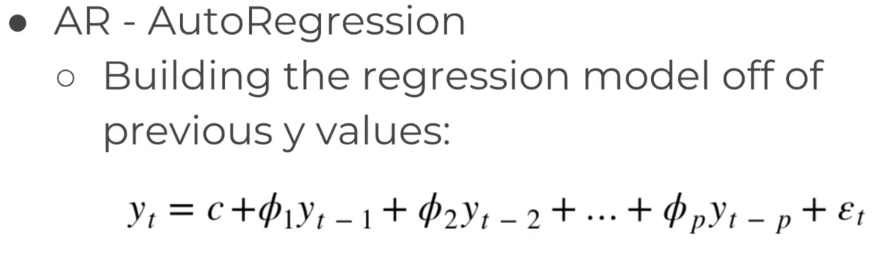
    

### MA - Moving Average
    Indicates the regression error is actually a linear combination of error terms
    whose values occured contemporaneously and at various times in the past
    
    A model that uses a dependency between an observation and a residual error from a moving 
    average model applied to lagged observations.
    
    When we plotted out moving average with pandas, it would "smooth" out the noise form the time series.
    
   <img 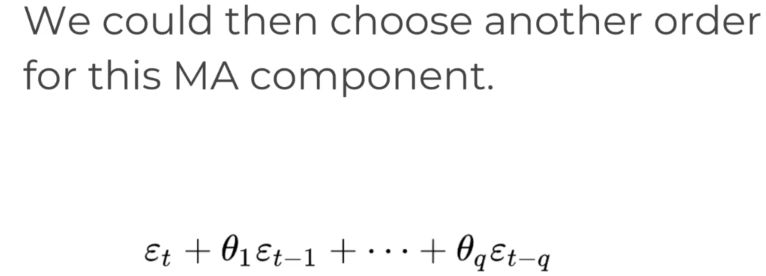
   <img 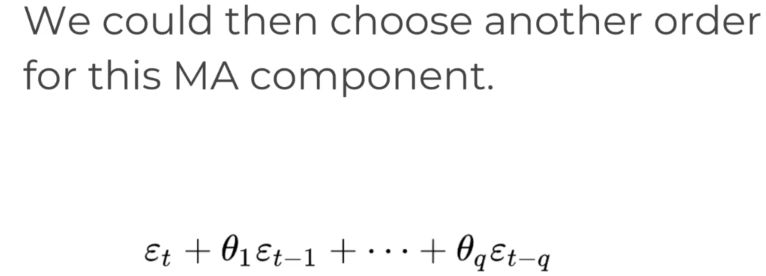

#### I - Integrated

    Indicates that the data values have been replaced with the differne between
    their values and previous values
    
   Basically means how many times did we have to difference the data to get it stationary so the AR and MA components could work.

Non-Seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters
p,d and q are non-negative integers.

<img 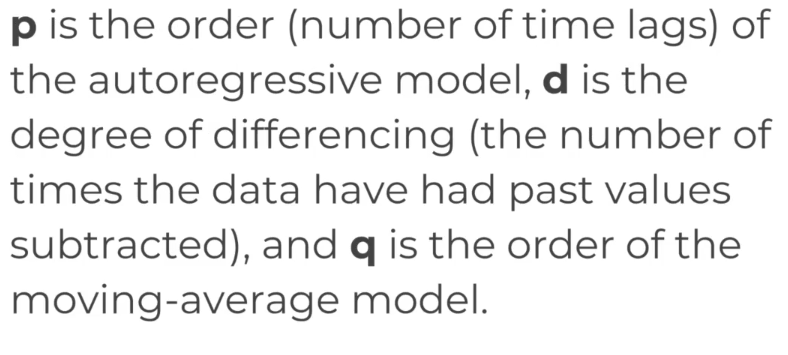

# ARMA

<img 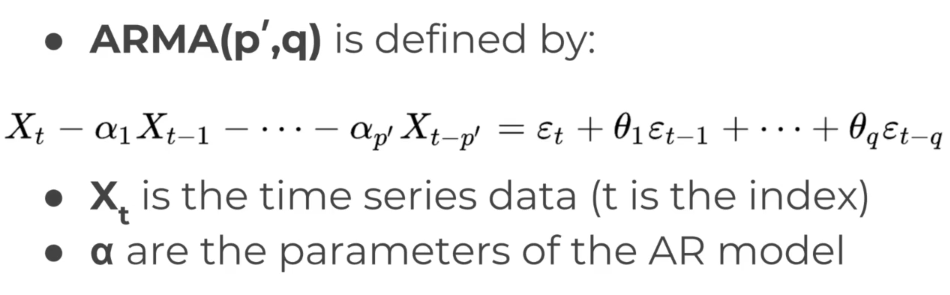

<img 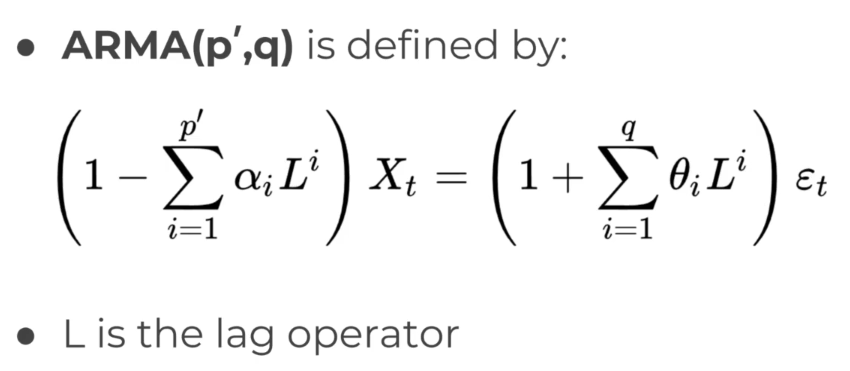

AR component on LHS = MA component at RHS

# ARIMA

<img 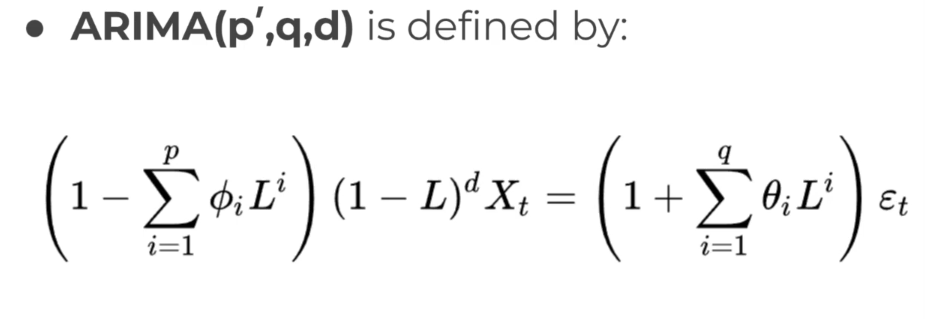

## Choosing ARIMA Orders

<img 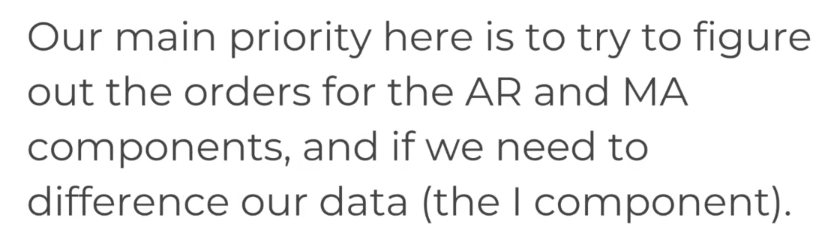

Depending on the dataset, it is quite common to only require AR or MA components,
we may not need both!

#### Visuale way - plotting acf and pacf plots and how to read them

<img 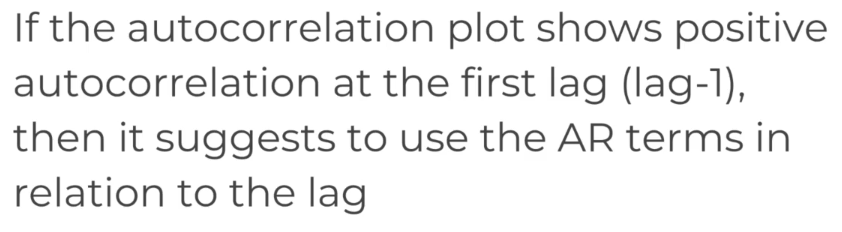

<img 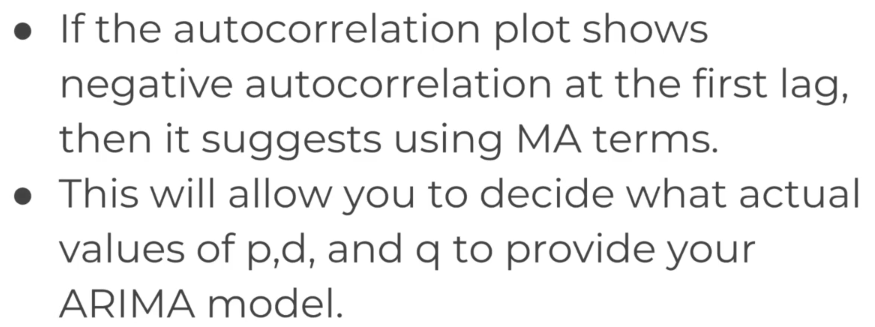

#### Typically a sharp drop after lag "k" suggest an AR-k Model should be used.

#### If there is a gradual decline, it suggests an MA model.

<img 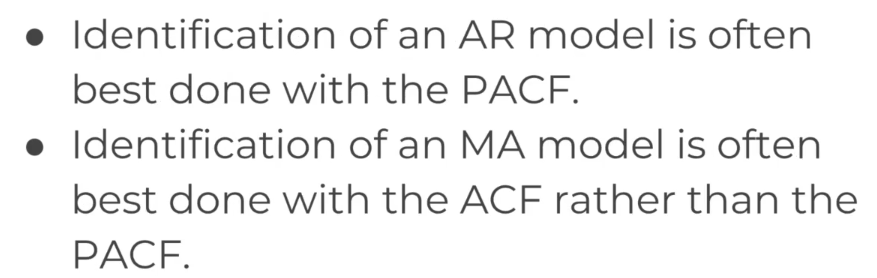

<img 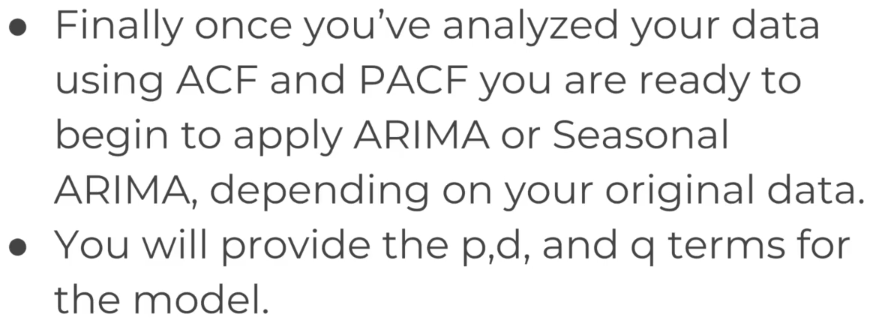

<img 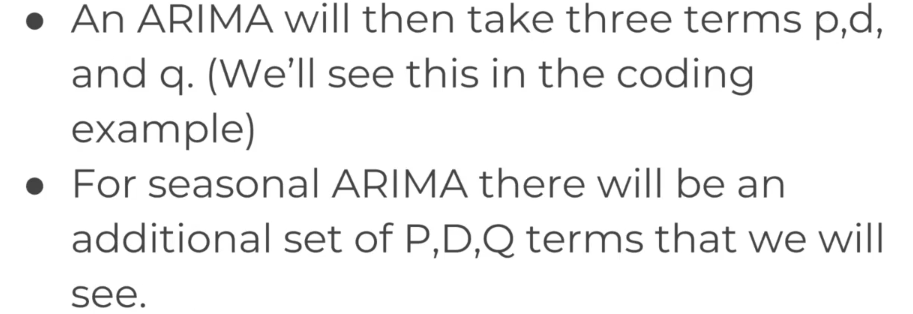

#### PMD ARIMA (Pyramid ARIMA)

This is a seperate library designed to perform grid searches across multiple combinations of p,d,q and P,D,Q.

pmd arima library utilizes the Akaike information criterion(AIC) as a metric to compare
the performance of various ARIMA models.

<img 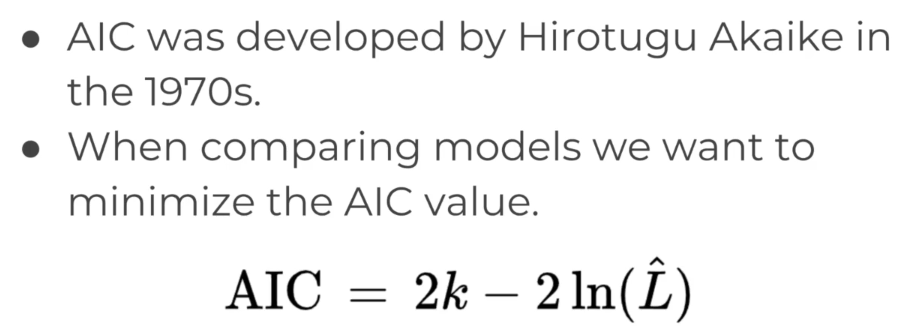

<img 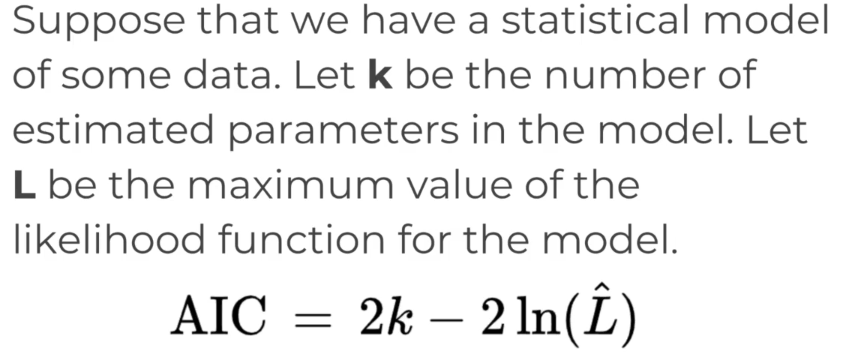

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load a non-stationary Dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [4]:
# Load stationary Dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [6]:
from pmdarima import auto_arima

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [10]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.946, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Fri, 07 Jan 2022   AIC                           2459.074
Time:                        12:33:59   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (Q):                       37.21   Jarque-Bera (JB):                25.33
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
## creating ARIMA model with order (1,1,1)

stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,
                          max_q=4,seasonal=True,trace=True,m=12)
# m is time period seasonal data,as its month wise data keeping m=12

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.91 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.62 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.74 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.63 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [13]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 07 Jan 2022   AIC                           1019.178
Time:                                     12:38:00   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA Model

In [14]:
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARIMAResults,ARMAResults

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [16]:
from pmdarima import auto_arima

In [17]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

In [19]:
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [22]:
# Grabbing only first 4 months of data for now
df1 = df1[:120]

In [23]:
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-04-26,35
1959-04-27,40
1959-04-28,42


In [24]:
df3 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df3.index.freq = 'MS'

# ARMA Code

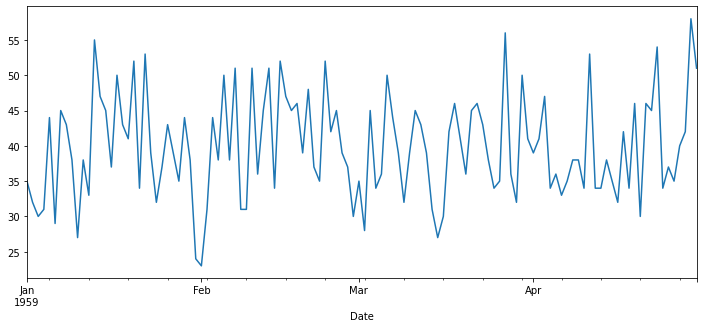

In [25]:
df1['Births'].plot(figsize=(12,5))

In [26]:
#Running Dickey fuller test to check the stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [27]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [28]:
## calling autoarima

auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 07 Jan 2022   AIC                            823.489
Time:                        12:47:10   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""